Introduction
- This dataset gives a number of variables along with a target condition of having or not having heart disease.
- We will try to use this data to create a model which tries predict if a patient has this disease or not.
- The "goal" field refers to the presence of heart disease in the patient.

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm


In [39]:
df=pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


About the data (Description of attributes)

- age: Age of the patient
- anaemia: Haemoglobin level of patient (Boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L) Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)
- diabetes: If the patient has diabetes (Boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction
- high_blood_pressure: If the patient has hypertension (Boolean)
- platelets: Platelet count of blood (kiloplatelets/mL) A normal platelet count in adults ranges from 150,000 to 450,000 platelets per microliter of blood.
- serum_creatinine: Level of serum creatinine in the blood (mg/dL) The typical range for serum creatinine is: For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L) For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)
- serum_sodium: Level of serum sodium in the blood (mEq/L) A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).
- sex: Sex of the patient
- smoking: If the patient smokes or not (Boolean)
- time: Follow-up period (days)
- DEATH_EVENT: If the patient deceased during the follow-up period (Boolean)
- [Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]

In [40]:
df.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [41]:
df.describe()
# age between 40 to 95
# anaemia is 0 or 1
# creatinine_phosphokinase between 23 and 7861
# diabetes 0 or 1
# ejection fraction between 14 and 80
# high bp is 0 or 1
# platelets between 25,100 and 850,000
# serum_creatining is 0.5 to 9.4
# serum sodium is 113 to 148
# sex is 0 or 1
# smoking is 0 or 1
# time is 4 to 285
#death_event is 0 or 1 and quite evenly balanced

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [42]:
## Cutting up the data ans setting the scalar
X=df.iloc[:,0:12].values
Y=df.iloc[:,12].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=0) # creates training and test sets

# Scaling the data (#)
scaler_X = MinMaxScaler() # this is often a really good one to use, but the industry standard is the standard scaler
X_train = scaler_X.fit_transform(X_train) # Scaling  training set
X_test = scaler_X.transform(X_test) # Scaling test set


In [43]:
# First ANN using scikit learn
mlp = MLPClassifier(hidden_layer_sizes=(2,2), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,Y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

print("Results on training data for Neural network")
print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))
print("Results on test data for Neural network")
print(confusion_matrix(Y_test,predict_test))
print(classification_report(Y_test,predict_test))


Results on training data for Neural network
[[141   0]
 [ 68   0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.81       141
           1       0.00      0.00      0.00        68

    accuracy                           0.67       209
   macro avg       0.34      0.50      0.40       209
weighted avg       0.46      0.67      0.54       209

Results on test data for Neural network
[[62  0]
 [28  0]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        62
           1       0.00      0.00      0.00        28

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.

In [44]:
# testing a logistic regression for comparison to ANN


logisticRegression_model = LogisticRegression(random_state=0) # Logistic Regression model
logisticRegression_model.fit(X_train, Y_train) # Training the model

prediction_test = logisticRegression_model.predict(X_test)
prediction_train = logisticRegression_model.predict(X_train) # Predict the response
## CALCULATE ACCURACY
print("Results on training data for log regression")
print(confusion_matrix(Y_train,prediction_train))
print(classification_report(Y_train,prediction_train))
print("Results on test data for Neural network")
print(confusion_matrix(Y_test,prediction_test))
print(classification_report(Y_test,prediction_test))


Results on training data for log regression
[[131  10]
 [ 23  45]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       141
           1       0.82      0.66      0.73        68

    accuracy                           0.84       209
   macro avg       0.83      0.80      0.81       209
weighted avg       0.84      0.84      0.84       209

Results on test data for Neural network
[[60  2]
 [17 11]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        62
           1       0.85      0.39      0.54        28

    accuracy                           0.79        90
   macro avg       0.81      0.68      0.70        90
weighted avg       0.80      0.79      0.76        90



In [45]:
# running a log regression to see how each variable contributes to a log regression

log_clf =sm.Logit(Y,X)

classifier = log_clf.fit()

print(classifier.summary2())
# this indicates that age, time, ejection fraction, serum creatinine are the most important variables

Optimization terminated successfully.
         Current function value: 0.372660
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.406     
Dependent Variable: y                AIC:              246.8505  
Date:               2022-11-19 18:59 BIC:              291.2558  
No. Observations:   299              Log-Likelihood:   -111.43   
Df Model:           11               LL-Null:          -187.67   
Df Residuals:       287              LLR p-value:      4.5991e-27
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1         0.0523     0.0155    3.3869   0.0007    0.0221    0.0826
x2        -0.0374     0.3568   -0.1049   0.9164   -0.7369 

In [46]:
# baseline model for ANN using Keras
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(12,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [48]:
...
# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 64.13% (15.62%)


In [49]:
# smaller model (this gives a slightly better performance on this model but forcing fewer nodes, thereby chosing the more important ones)
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(6, input_shape=(12,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 81.26% (5.44%)


In [50]:
# smaller model with just 4 as log regression suggests 4 were important, which is not really any better
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(4, input_shape=(12,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 80.61% (3.22%)


In [51]:
# larger model with an extra layer- doesn't seem to perform better than the small one above
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(12,), activation='relu'))
	model.add(Dense(3, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger on test: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Larger on test: 80.94% (6.14%)


Training error is: 0.25 epoch error is: 52.25 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3


/var/folders/w3/j_v3f_rs4hlbh_rnzsc6j2rm0000gn/T/ipykernel_13830/909746665.py:24: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-x))


Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966507177033 epoch error is: 59.0 learning rate is: 0.3
Training error is: 0.2822966

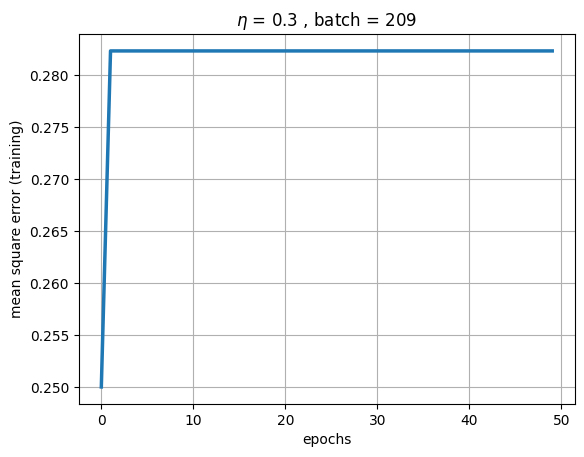

Network accuracy over 90 samples is 58.889


In [52]:
# Starting the ANN from scratch (which doesn't seem to converge)

hf_df = np.genfromtxt("Data/heart_failure_clinical_records_dataset.csv", delimiter = ',') 
x = hf_df.data
x = np.delete(x, (0), axis=0)
x_labs = x[:,-1]
x_labs = x_labs.astype(np.int64)
labels = np.unique(x_labs) #get unique labels
labels = labels.astype(np.int64)

# Network output format
y_labs = np.zeros((x.shape[0],len(labels)),dtype = 'int')
for i,j in enumerate(x_labs):
    y_labs[i,j] = 1



# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_labs, 
                                                    test_size=0.3, random_state=42)

# Sigmoid function and derivation, 
def sigmoid(x): # can chose a different function here
    return 1.0/(1.0+np.exp(-x))
def dsigmoid(x):
    return sigmoid(x)*(1.0-sigmoid(x))


# Network specifications (this one does not have a hidden layer)
layer_input = x.shape[1]
layer_output = len(labels)

# Other parameters
learning_rate = 0.3 # can play around with this and the epoch
epochs_number = 50
batch_size = x_train.shape[0] # this is set to the shape of the dataset, but can be otherwise

# Track the error in each epoch
training_error = np.zeros((epochs_number))

# Weights and bias in output
weights = np.zeros((layer_output, layer_input)) # this and bias are set as 0s as this is a simplee ANN
bias = np.zeros((layer_output))


# Train the network
for i in range(epochs_number):
    
    epoch_error = 0
    change_weights = np.zeros(weights.shape)
    change_bias = np.zeros(bias.shape)
    
    # Iterate over the batch 
    for j in range(batch_size):
        # Feedforward
        weighted_sum = np.dot(weights, x_train[j]) + bias
        network_output = sigmoid(weighted_sum)
        
        # Error calculation
        #epoch_error = network_output - y_train[j]
        #epoch_error = np.square(epoch_error)
        #epoch_error = 0.5 * np.sum(epoch_error)
        epoch_error += 0.5 * np.sum( np.square( network_output - y_train[j] ) ) 
        
        # Backpropagation
        # Delta function
        delta = (y_train[j]-network_output) * dsigmoid(weighted_sum)
        
        # Compute the change in the weights
        change_weights += learning_rate * np.outer(delta, x_train[j])
        
        # Compute the change in the bias
        change_bias += learning_rate * delta
    
    # Update the weights and the bias
    weights += change_weights / batch_size
    bias += change_bias / batch_size
       
    # Store the error of this epoch
    training_error[i] = epoch_error / batch_size
    print("Training error is:",training_error[i],"epoch error is:",epoch_error,"learning rate is:",learning_rate)
    
    
# See if the network is training
fig, ax = plt.subplots()
ax.plot(training_error, lw=2.5)
ax.grid()
ax.set_xlabel('epochs')
ax.set_ylabel('mean square error (training)')
ax.set_title('$\eta$ = ' +str(learning_rate)+ ' , batch = ' +str(batch_size))
plt.show()


# Test the network using unseen data
test_size = len(y_test)
accuracy = 0

for i in range(test_size):
    
    weighted_sum = np.dot(weights, x_test[i]) + bias
    network_output = sigmoid(weighted_sum)
    
    # If the most active neuron matches the label increase the accuracy
    if np.argmax(network_output) == np.argmax(y_test[i]):
        accuracy += 1

percentage_accuracy = 100 * accuracy / test_size  
print('Network accuracy over ' +str(test_size)+ ' samples is ' +str(round(percentage_accuracy,3)))